In [15]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [16]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper.
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
# create engine to hawaii.sqlite.
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model.
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)
#Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found.
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table.
Station = Base.classes.station
Measurement = Base.classes.measurement

In [22]:
# Create our session (link) from Python to the DB.
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

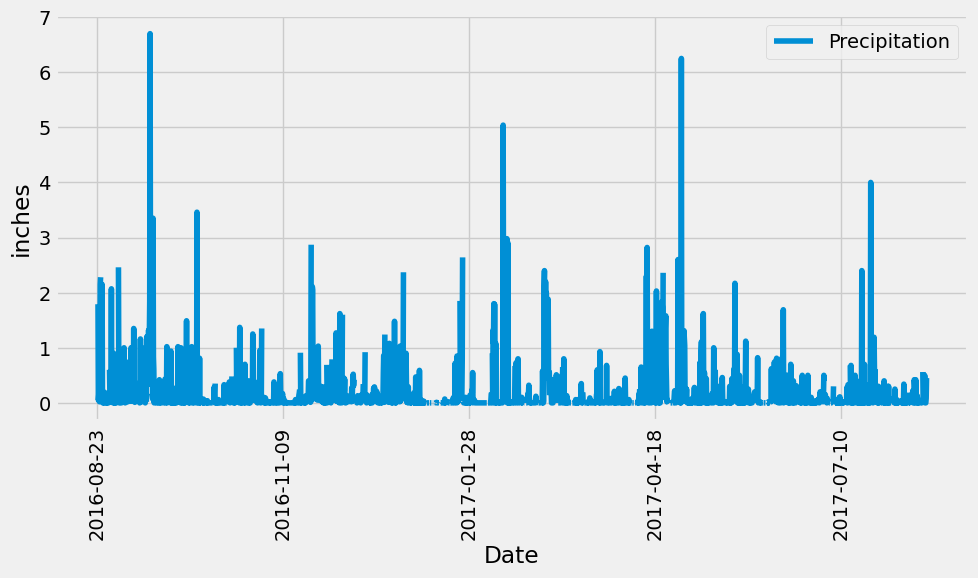

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago

# Perform a query to retrieve the data and precipitation scores.
query_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names.
df = pd.DataFrame(query_results, columns=["Date", "Precipitation"])

# Sort the dataframe by date.
df = df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data.
df.plot(x="Date", y="Precipitation", kind="line", figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data.
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number of stations in the dataset.
station_count = session.query(func.count(Station.station)).all()
station_count

[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Calculate the number of rows (activity) for each station in the most active stations.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all() #order the query results based on the count of rows for each station in descending order 
                                                           #so that the most active stations (those with the highest count) appear first in the results.

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

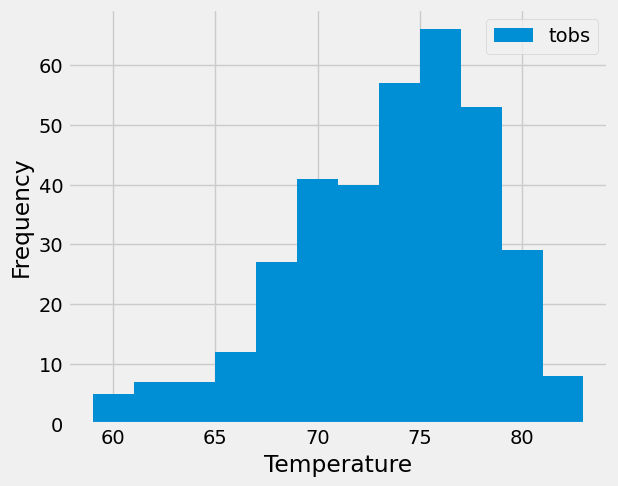

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()